In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load both
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

# Add labels
fake_df['label'] = 1  # or 'fake'
true_df['label'] = 0  # or 'real'

# Combine into one dataset
df = pd.concat([fake_df, true_df], ignore_index=True)


In [3]:
df.tail(50)

,title,text,subject,date,label
44848,"As guns fall silent, Benghazi residents return...","BENGHAZI, Libya (Reuters) - Two months after t...",worldnews,"August 24, 2017",0
44849,Venezuela's injured activists struggle to heal,"CARACAS (Reuters) - Jesus Ibarra, a 19-year-ol...",worldnews,"August 24, 2017",0
44850,India's push to broaden use of its biometric d...,(Reuters) - India s Supreme Court ruled on Thu...,worldnews,"August 24, 2017",0
44851,Finnish police release one knife attack suspect,HELSINKI (Reuters) - Finnish police on Thursda...,worldnews,"August 24, 2017",0
44852,"As Syria war tightens, U.S. and Russia militar...","AL UDEID AIR BASE, Qatar (Reuters) - Even as t...",worldnews,"August 24, 2017",0
44853,U.N. calls for pause in air strikes to spare c...,GENEVA (Reuters) - The United Nations called o...,worldnews,"August 24, 2017",0
44854,EU citizens leaving UK pushes down net migrati...,LONDON (Reuters) - Net migration to Britain fe...,worldnews,"August 24, 2017",0
44855,Excessive force won't solve Myanmar's Rohingya...,YANGON (Reuters) - Myanmar should respond to a...,worldnews,"August 24, 2017",0
44856,Britain to study effect of foreign students on...,LONDON (Reuters) - Britain commissioned a repo...,worldnews,"August 24, 2017",0
44857,Turkish nationalist leader says Iraqi Kurdish ...,ANKARA (Reuters) - The head of Turkey s nation...,worldnews,"August 24, 2017",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

<Axes: title={'center': 'Articles per Subject'}, xlabel='subject'>

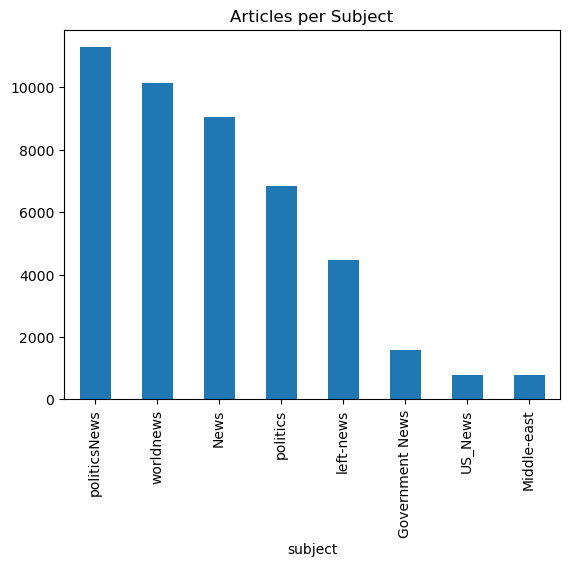

In [6]:
df['subject'].value_counts().plot(kind='bar', title='Articles per Subject')


In [7]:
# We drop the Subject column as it is not much informative and will make problems for our model training
df.drop(columns = ['subject'], inplace = True)

In [8]:
df.dropna(inplace = True)

In [9]:
# these specific 10 raws are corrupt caused problems during analysis of the date

# List of the indices you want to view
target_indices = [9358, 15507, 15508, 15839, 15840, 17432, 17433, 18933, 21869, 21870]

# Display those rows from the DataFrame
df.loc[target_indices]


,title,text,date,label
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,1
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,1
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,1
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,1
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,1
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,1
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,1
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,MSNBC HOST Rudely Assumes Steel Worker Would N...,1
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,1
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,1


In [10]:
# we drop the corrupt raws
df.drop(index=target_indices, inplace=True)



In [11]:
import re

# Define regex pattern for 'Month DD, YYYY' (e.g., January 27, 2016)
correct_format_pattern = r'^[A-Z][a-z]+ \d{1,2}, \d{4}$'

# Filter rows NOT matching the pattern
bad_date_rows = df[~df['date'].str.match(correct_format_pattern, na=False)]

print(bad_date_rows)


                                                   title  \
9050   Democrat Senator Warns Mueller Not To Release ...   
9051   MSNBC ANCHOR Flabbergasted at What Texas Teach...   
9052   WATCH: SNOWFLAKES ASKED Communist Party Platfo...   
9053   JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...   
9054   DOJ’s JEFF SESSIONS Opens Investigation Into W...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text              date  \
9050   According to The Hill, Democrat Senator Bob Ca...         19-Feb-18   
9051   If we protect every other government building ...         19-Feb-18   
9052   Ami Horowitz is fantastic! Check out t

In [12]:
# Define the correct format pattern
correct_format_pattern = r'^[A-Z][a-z]+ \d{1,2}, \d{4}$'

# Count how many rows do NOT match that format
bad_format_count = (~df['date'].str.match(correct_format_pattern, na=False)).sum()

print("Rows with incorrect date format:", bad_format_count)

Rows with incorrect date format: 21452


In [13]:
# Step 1: Convert all to datetime (handle mixed formats safely)
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')

# Step 2: Drop rows that couldn't be converted
df = df[df['date'].notna()]

# Step 3: Format all dates to 'Month DD, YYYY' (e.g., January 27, 2016)
df['date'] = df['date'].dt.strftime('%B %d, %Y')


In [14]:
df

,title,text,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",1
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",0


In [15]:
df.duplicated().sum()

5784

In [16]:
df.drop_duplicates(inplace=True)


<Axes: title={'center': 'Articles per Year'}, xlabel='date'>

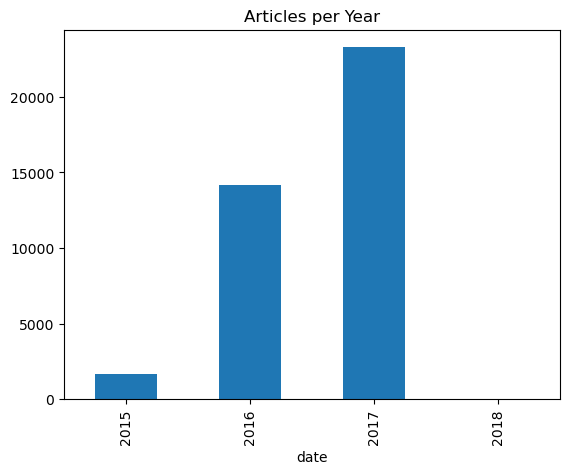

In [17]:
# Plot articles per year without modifying the DataFrame
df['date'].pipe(pd.to_datetime).dt.year.value_counts().sort_index().plot(
    kind='bar', title='Articles per Year'
)


In [18]:
df

,title,text,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",1
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",0


In [19]:
# We drop the year column as it may not do good to our train model

df.drop(columns = ['date'], inplace = True)

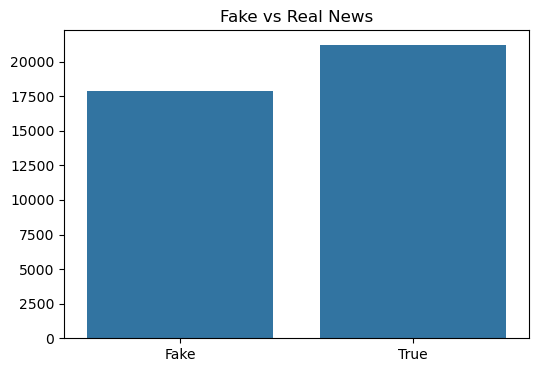

In [20]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['label'].map({0: 'True', 1: 'Fake'}))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Fake vs Real News')

plt.show()


In [21]:
df

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


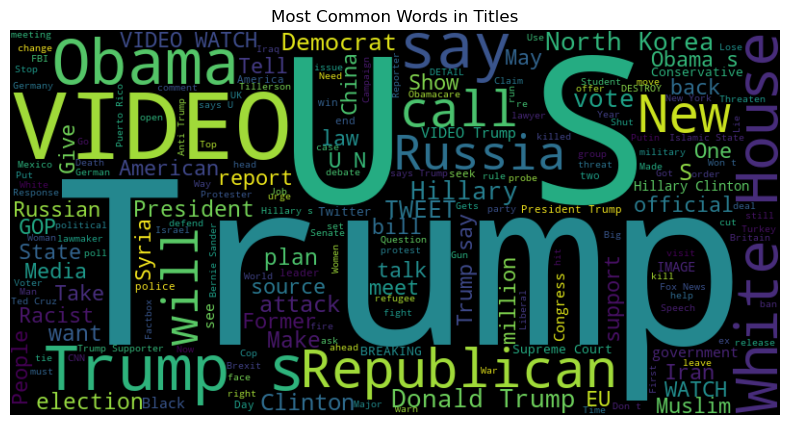

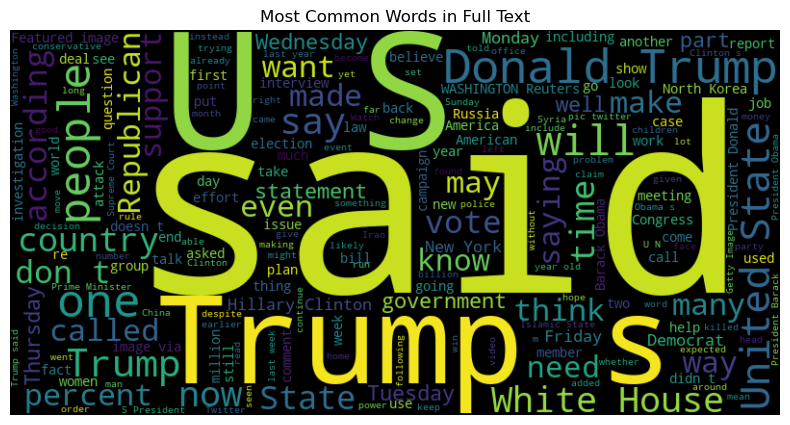

In [22]:
from wordcloud import WordCloud

# WordCloud for Titles
title_words = ' '.join(df['title'].dropna().astype(str))
title_wordcloud = WordCloud(width=800, height=400).generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Titles")
plt.show()

# WordCloud for Text
text_words = ' '.join(df['text'].dropna().astype(str))
text_wordcloud = WordCloud(width=800, height=400).generate(text_words)

plt.figure(figsize=(10, 5))
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Full Text")
plt.show()



In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(df[df['label'] == 1]['title'].dropna())
sum_words = X.sum(axis=0)

word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]

for phrase, freq in word_freq:
    print(f"{phrase}: {freq}")


donald trump: 710
hillary clinton: 317
president trump: 306
fox news: 273
white house: 267
trump video: 233
ted cruz: 213
trump just: 200
bernie sanders: 194
trump supporter: 169


In [24]:
duplicates = df[df.duplicated(subset='text')]
print(f"Duplicate articles found: {len(duplicates)}")


Duplicate articles found: 464


In [25]:
print(duplicates['label'].value_counts())


label
1    455
0      9
Name: count, dtype: int64


In [26]:
duplicates['title'].value_counts().head(10)


title
WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD County Is Still Fighting For Trump: “He was the hope we were all waiting on, the guy riding up on the white horse” [VIDEO]    1
LIVE STREAM: DONALD TRUMP -FIRST 100 DAYS SPEECH – GETTYSBURG, PA [VIDEO]                                                                                              1
WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO]                     1
BILL CLINTON: West Virginia Miners Believe Climate Change Cost Them Their Jobs [Video]                                                                                 1
YES! NEWT GINGRICH Rips Into ABC Anchor Over Anti-Trump Coverage [Video]                                                                                               1
COMEDY GOLD! NANCY PELOSI Talks Clinton And Trump In Epic Train Wreck Interview                                                                      

In [27]:
empty_text_count = df['text'].isna().sum() + (df['text'].str.strip() == '').sum()
print(f"Number of rows with empty or null text: {empty_text_count}")



Number of rows with empty or null text: 447


In [28]:
df = df[~(df['text'].isna() | (df['text'].str.strip() == ''))]
print(f"New shape after dropping: {df.shape}")


New shape after dropping: (38657, 3)


In [29]:
title_duplicates = df[df.duplicated(subset='title')]
print(f"Duplicate title entries: {len(title_duplicates)}")



Duplicate title entries: 381


In [30]:
text_duplicates = df[df.duplicated(subset='text')]
print(f"Duplicate text entries: {len(text_duplicates)}")


Duplicate text entries: 19


In [31]:
df = df.drop_duplicates(subset='text', keep='first')
df = df.drop_duplicates(subset='title', keep='first')



In [32]:
title_duplicates = df[df.duplicated(subset='title')]
print(f"Duplicate title entries: {len(title_duplicates)}")



Duplicate title entries: 0


C:\Users\42077\AppData\Local\Temp\ipykernel_22376\4119368044.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['text', 'title']].applymap(len).hist(bins=30, figsize=(12, 5))


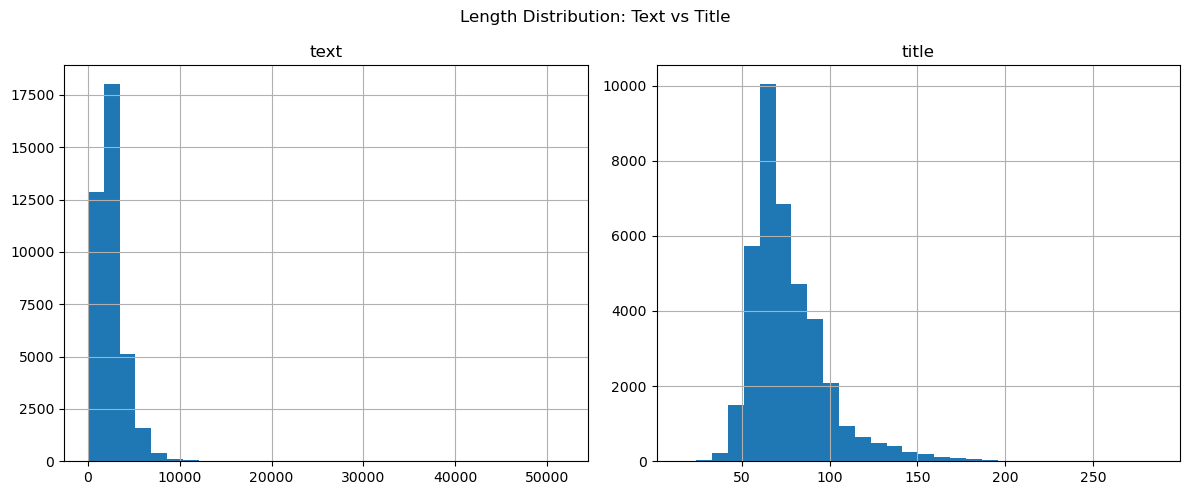

In [33]:
df[['text', 'title']].applymap(len).hist(bins=30, figsize=(12, 5))
plt.suptitle("Length Distribution: Text vs Title")
plt.tight_layout()
plt.show()



In [34]:
print(df.columns)         # Check current columns
print(df['label'].unique())

Index(['title', 'text', 'label'], dtype='object')
[1 0]


In [35]:
df = df[['title', 'text', 'label']]
df

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [36]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\42077\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\42077\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\42077\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\42077\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    try:
        text = re.sub(r'\s+', ' ', text, flags=re.I)
        text = re.sub(r'\W', ' ', str(text))
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()

        words = text.split()  # ← No punkt, just split by whitespace
        words = [lemmatizer.lemmatize(word) for word in words]
        words = [word for word in words if word not in stop_words]
        words = [word for word in words if len(word) > 3]

        indices = np.unique(words, return_index=True)[1]
        cleaned_text = np.array(words)[np.sort(indices)].tolist()

        return cleaned_text
    except Exception as e:
        print(f"Error processing: {text[:100]}...\n{e}")
        return []



In [38]:
X = (df['title'] + ' ' + df['text']).fillna('')
y = df['label']

X_cleaned = X.apply(process_text)
X_cleaned = X_cleaned.apply(lambda tokens: ' '.join(tokens))


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [86]:

from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9887625767672809
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4221
           1       0.99      0.98      0.99      3432

    accuracy                           0.99      7653
   macro avg       0.99      0.99      0.99      7653
weighted avg       0.99      0.99      0.99      7653

